<a href="https://colab.research.google.com/github/shivanivadlamani/Unsupervised-Learning---Book-Recommender-system/blob/main/Unsupervised_learning_Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Book Recommendation System**

---
**by- Vadlamani Shivani**

**Github link** - https://github.com/shivanivadlamani/Unsupervised-Learning---Book-Recommender-system.git

This project created a book recommendation system using unsupervised learning techniques. The data was explored, analyzed, and visualized to gain insights. The data was pre-processed and cleaned to handle missing values and outliers. Several recommender systems were built, including popularity-based filtering, correlation-based recommendations, and collaborative filtering using cosine similarity and k-nearest neighbors. The project demonstrated the potential of these techniques to generate personalized book recommendations for users.

The book crossing dataset contains three files: Books, Users, and Ratings. The books csv contains 271,360 rows and 8 columns. The users csv contains 278,858 rows and 3 columns. The ratings csv contains 1,149,780 rows and 3 columns. There are almost 40% missing values in the age column of the user csv.

The main objective of the project was to create a book recommendation system for users. Recommender systems are algorithms that suggest relevant items to users. They are critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

The project involved data wrangling, including renaming columns, changing datatypes, creating new columns from existing ones, and replacing errors in the data. Data visualization was used to understand the relationships between variables and gain insights from the data.

Several recommender systems were built, including popularity-based filtering, which ranks books based on their average rating and the number of ratings they have received; recommendations based on correlation, which generates recommendations for a specific book among books that have been rated a sufficient number of times; collaborative filtering using cosine similarity (User-User), which calculates the average rating for each book among the k most similar users to the input user; and collaborative filtering using k-nearest neighbors [kNN], which finds the k nearest neighbors of the input book and returns their ISBNs along with their distance to the input book.

Future work includes saving the best performing machine learning model in a pickle or joblib file format for deployment on a live server for real user interaction.

Here are some additional details that could be included in the project summary:

The specific unsupervised learning techniques that were used.
The evaluation metrics that were used to assess the performance of the recommender systems.
The limitations of the project and suggestions for future work.

## Importing Libraries and Mounting datasets

---



In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix





In [475]:
books = pd.read_csv('/content/drive/MyDrive/Unsupervised - project/Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Unsupervised - project/Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/Unsupervised - project/Users.csv')

<ipython-input-475-dde0bf1b456b>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/Unsupervised - project/Books.csv')


## Exploring datasets and Understanding Variables

---



### Books

---



In [476]:
books.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
205541,1565927249,The Cathedral and the Bazaar: Musings on Linux...,Eric S. Raymond,1999,O'Reilly &amp; Associates,http://images.amazon.com/images/P/1565927249.0...,http://images.amazon.com/images/P/1565927249.0...,http://images.amazon.com/images/P/1565927249.0...
227150,0452272424,You Can Feel Good Again: Common-Sense Therapy ...,Richard Carlson,1994,Plume Books,http://images.amazon.com/images/P/0452272424.0...,http://images.amazon.com/images/P/0452272424.0...,http://images.amazon.com/images/P/0452272424.0...
186865,0440925851,FAR FROM SHORE,KEVIN MAJOR,1983,Laurel Leaf,http://images.amazon.com/images/P/0440925851.0...,http://images.amazon.com/images/P/0440925851.0...,http://images.amazon.com/images/P/0440925851.0...
158406,0440218012,Ancient Secrets of the Bible,Charles E. Sellier,1994,Dell Publishing Company,http://images.amazon.com/images/P/0440218012.0...,http://images.amazon.com/images/P/0440218012.0...,http://images.amazon.com/images/P/0440218012.0...
254136,0870941135,How Effective Executives Interview,Walter Robert Mahler,1976,McGraw Hill (Tx),http://images.amazon.com/images/P/0870941135.0...,http://images.amazon.com/images/P/0870941135.0...,http://images.amazon.com/images/P/0870941135.0...


In [477]:
books.shape

(271360, 8)

In [478]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [479]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [480]:
books.duplicated().sum()

0

In [481]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [482]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


### Ratings

---



In [483]:
ratings.sample(5)

,User-ID,ISBN,Book-Rating
210311,48975,0399141383,7
1090111,261327,0786886625,0
856804,207180,1878257862,10
454859,109278,0373286678,7
945038,228998,0385508042,0


In [484]:
ratings.shape

(1149780, 3)

In [485]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [486]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [487]:
ratings.duplicated().sum()

0

In [488]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [489]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Users

---



In [490]:
users.sample(5)

,User-ID,Location,Age
180122,180123,"quinta do conde, ,",35.0
219666,219667,"missoula, montana, netherlands",NaN
216994,216995,"bologna, emilia romagna, italy",NaN
239696,239697,"schwerin, mecklenburg-vorpommern, germany",NaN
15651,15652,"portland, oregon, usa",NaN


In [491]:
users.shape

(278858, 3)

In [492]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [493]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [494]:
users.duplicated().sum()

0

In [495]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [496]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### **Books**

***ISBN*** :  The International Standard Book Number (ISBN) is a unique identification number assigned to books.

***Book-Title*** :  The title of the book.

***Book-Author*** :  The author of the book.

***Year-Of-Publication*** :  The year the book was published.

***Publisher*** :  The publisher of the book.

***Image-URL-S*** : The URL of a small image of the book.

***Image-URL-M*** : The URL of a medium image of the book.

***Image-URL-L*** :  The URL of a large image of the book.

### **Users**

***User-ID*** :  The anonymized user ID.

***Location*** :  The user's location, if available.

***Age*** :  The user's age, if available.

### **Ratings**

***User-ID*** : The anonymized user ID.

***ISBN*** : The ISBN of the book.

***Book-Rating*** :  The rating of the book by the user. The rating can be either explicit (on a scale of 1 to 10) or implicit (0).

## Check Unique Values for each variable.

---



In [497]:
#This function counts the number of unique values in each column of a Pandas DataFrame.
def unique_values(data):
  for column in data.columns:
    print(f"Number of unique values in {column}: {data[column].nunique()}")

In [498]:
unique_values(books)

Number of unique values in ISBN: 271360
Number of unique values in Book-Title: 242135
Number of unique values in Book-Author: 102023
Number of unique values in Year-Of-Publication: 202
Number of unique values in Publisher: 16807
Number of unique values in Image-URL-S: 271044
Number of unique values in Image-URL-M: 271044
Number of unique values in Image-URL-L: 271041


In [499]:
unique_values(ratings)

Number of unique values in User-ID: 105283
Number of unique values in ISBN: 340556
Number of unique values in Book-Rating: 11


In [500]:
unique_values(users)

Number of unique values in User-ID: 278858
Number of unique values in Location: 57339
Number of unique values in Age: 165


# Data Wrangling

---



In [501]:
# Create a dictionary to map the old column names to the new column names.
column_map = {
    "ISBN": "isbn",
    "Book-Title": "book_title",
    "Book-Author": "book_author",
    "Year-Of-Publication": "year_of_publication",
    "Publisher": "publisher",
    "Image-URL-S": "img_s",
    "Image-URL-M": "img_m",
    "Image-URL-L": "img_l",
}

# Rename the columns in the DataFrame.
books.rename(columns=column_map, inplace=True)

books.head(5)

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [502]:
#This function changes all HTTP URLs to HTTPS URLs.
def change_url(url):
  if not isinstance(url, str):
    return url

  return re.sub(r"http://", "https://", url)

# Change the URLs in the `img_s`, `img_m`, and `img_l` columns.
books['img_s'] = books['img_s'].apply(change_url)
books['img_m'] = books['img_m'].apply(change_url)
books['img_l'] = books['img_l'].apply(change_url)

In [503]:
ratings.rename(columns={'User-ID':'user_id', 'ISBN':'isbn',
                      'Book-Rating':'book_rating'}
        , inplace=True)

In [504]:
users.rename(columns={'User-ID':'user_id', 'Location':'location', 'Age':'age'}
        , inplace=True)

In [505]:
books['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [506]:
books['year_of_publication'] = pd.to_numeric(books['year_of_publication'], errors='coerce')
users['user_id'] = users['user_id'].astype(int)
users['age'] = users['age'].astype(float)
ratings['user_id'] = ratings['user_id'].astype(int)
ratings['book_rating'] = ratings['book_rating'].astype(int)

The year of publication column contains invalid values. We will replace values greater than 2006 with NaN.

In [507]:
# This function replaces invalid years in the year_of_publication column with NaN.
def replace_invalid_years(df):
  invalid_years = [0, 2006]
  for year in invalid_years:
    df.loc[df['year_of_publication'] == year, 'year_of_publication'] = np.nan

  return df


books = replace_invalid_years(books.copy())

In [508]:
location = users.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

users['city'] = location['city']
users['state'] = location['state']
users['country'] = location['country']

In [509]:
users


,user_id,location,age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,tennessee,usa


In [510]:
users.country.unique()


array(['usa', 'russia', 'portugal', ..., 'la svizzera', 'hernando',
       'united kingdom.'], dtype=object)

In [511]:
users['country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)


In [512]:
#This function replaces the country names in the `country` column with more standardized names
def replace_countries(df):
 # Create a dictionary to map the old country names to the new country names.
  country_map = {
    '': 'other',
    '01776': 'usa',
    '02458': 'usa',
    '19104': 'usa',
    '23232': 'usa',
    '30064': 'usa',
    '85021': 'usa',
    '87510': 'usa',
    'alachua': 'usa',
    'america': 'usa',
    'austria': 'austria',
    'autralia': 'australia',
    'cananda': 'canada',
    'geermany': 'germany',
    'italia': 'italy',
    'united kindgonm': 'united kingdom',
    'united sates': 'usa',
    'united staes': 'usa',
    'united state': 'usa',
    'united states': 'usa',
    'us': 'usa',
  }

  # Replace the country names in the DataFrame.
  df['country'].replace(country_map, inplace=True)

  return df


users = replace_countries(users.copy())

In [513]:
users.head()

,user_id,location,age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


## Merging the dataset

---



In [514]:
# Merging the dataframe using userid and isbn columns
data = pd.merge(users, ratings, on = 'user_id')
data = pd.merge(data, books, on='isbn')
data.head()

,user_id,location,age,city,state,country,isbn,book_rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,2,"stockton, california, usa",18.0,stockton,california,usa,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....
1,8,"timmins, ontario, canada",NaN,timmins,ontario,canada,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....
2,11400,"ottawa, ontario, canada",49.0,ottawa,ontario,canada,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....
3,11676,"n/a, n/a, n/a",NaN,n/a,n/a,n/a,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....
4,41385,"sudbury, ontario, canada",NaN,sudbury,ontario,canada,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....


In [515]:
data.shape

(1031136, 15)

In [516]:
# Removing the unwanted columns
data_df = data.drop(['location','img_s','img_m','img_l'], axis = 1)

In [517]:
data_df.head()

,user_id,age,city,state,country,isbn,book_rating,book_title,book_author,year_of_publication,publisher
0,2,18.0,stockton,california,usa,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,8,NaN,timmins,ontario,canada,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,11400,49.0,ottawa,ontario,canada,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,11676,NaN,n/a,n/a,n/a,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,41385,NaN,sudbury,ontario,canada,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


Renamed all the columns for the 3 csv:

Renamed 3 CSV columns.

        Changed the required datatypes for some columns:

Changed some column data types.

        Created a country, city and state column from the location column:

Split location column into 3 columns.

        Replaced most of the errors in the country column:

Fixed country column errors.

        Limited the year of publication as per the book crossing dataset:

Filtered year of publication.

## Data Vizualization, Storytelling....

---



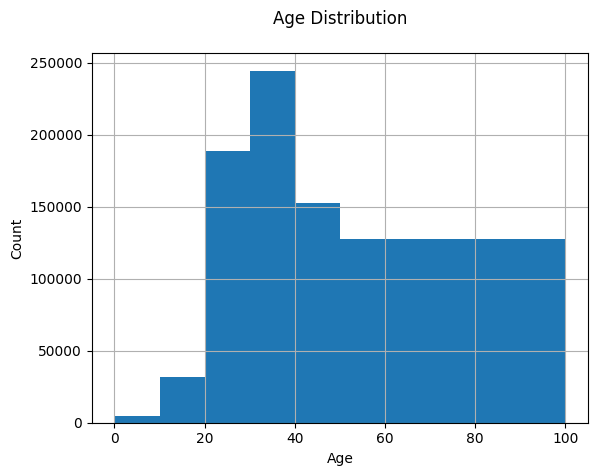

In [518]:
#Age distribution

data_df.age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Count of users Country wise')

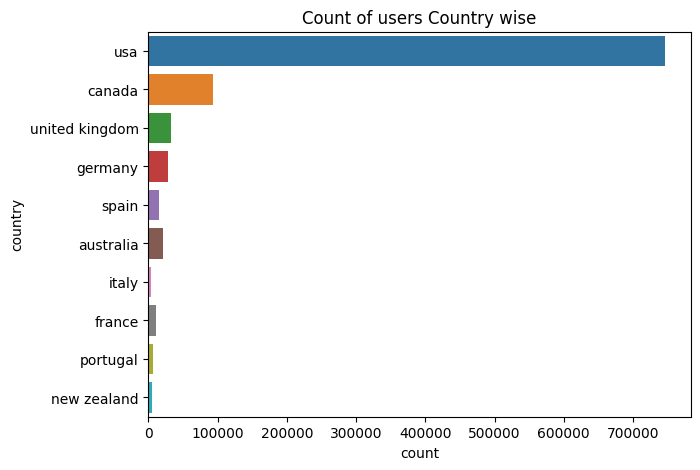

In [519]:
# country wise user count
plt.figure(figsize=(7,5))
sns.countplot(y='country',data=data_df,order=pd.value_counts(users['country']).iloc[:10].index)
plt.title('Count of users Country wise')


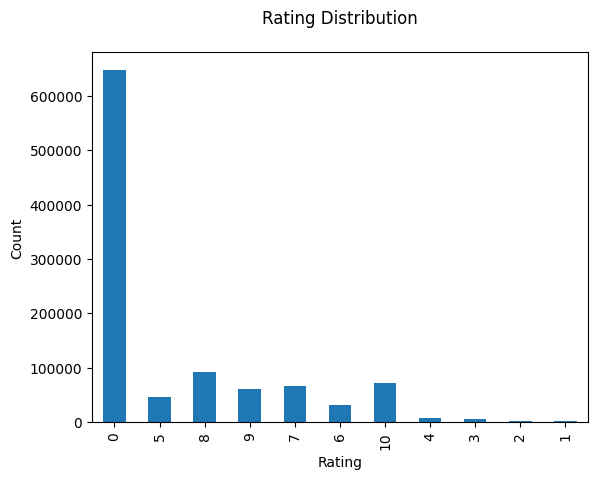

In [520]:
#Let's see how the ratings are distributed

plt.rc("font", size=10)
data_df['book_rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [521]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = data_df[data_df['book_rating'] != 0]
ratings_implicit = data_df[data_df['book_rating'] == 0]

<Axes: xlabel='book_rating', ylabel='count'>

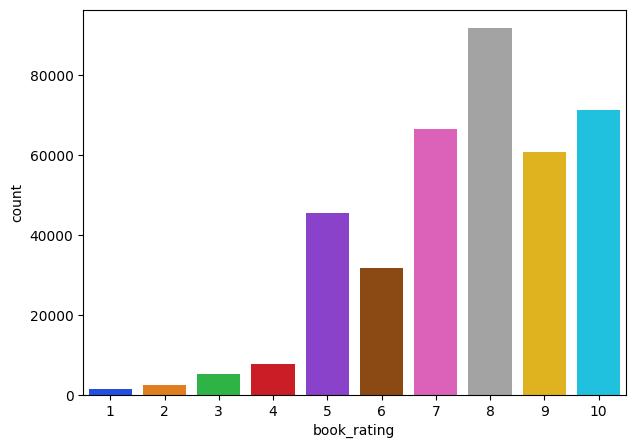

In [522]:
#book rating vs count
plt.figure(figsize=(7, 5))
sns.countplot(data=ratings_explicit  , x='book_rating', palette='bright')

In [523]:
year = books['year_of_publication'].value_counts().reset_index()
year.columns = ['year', 'count']
year = year.sort_values(by='count', ascending=False).head(15)
year['year']='Year '+year['year'].astype(int).astype(str)

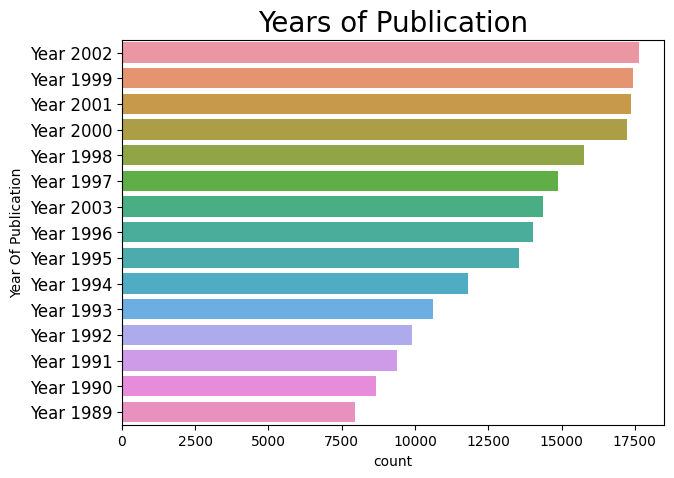

In [524]:
# Year of publication
plt.figure(figsize=(7,5))
sns.barplot(x='count',y='year',data=year, orient = 'h')
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()


In [525]:
def bar_plot(df,col,label):
    df = df[col].value_counts().head(15).reset_index()
    df.columns=[col,'count']

    plt.figure(figsize=(10,8))
    sns.barplot(x='count',y=col,data=df)
    plt.ylabel(label)
    plt.title(label,size=20)
    plt.show()

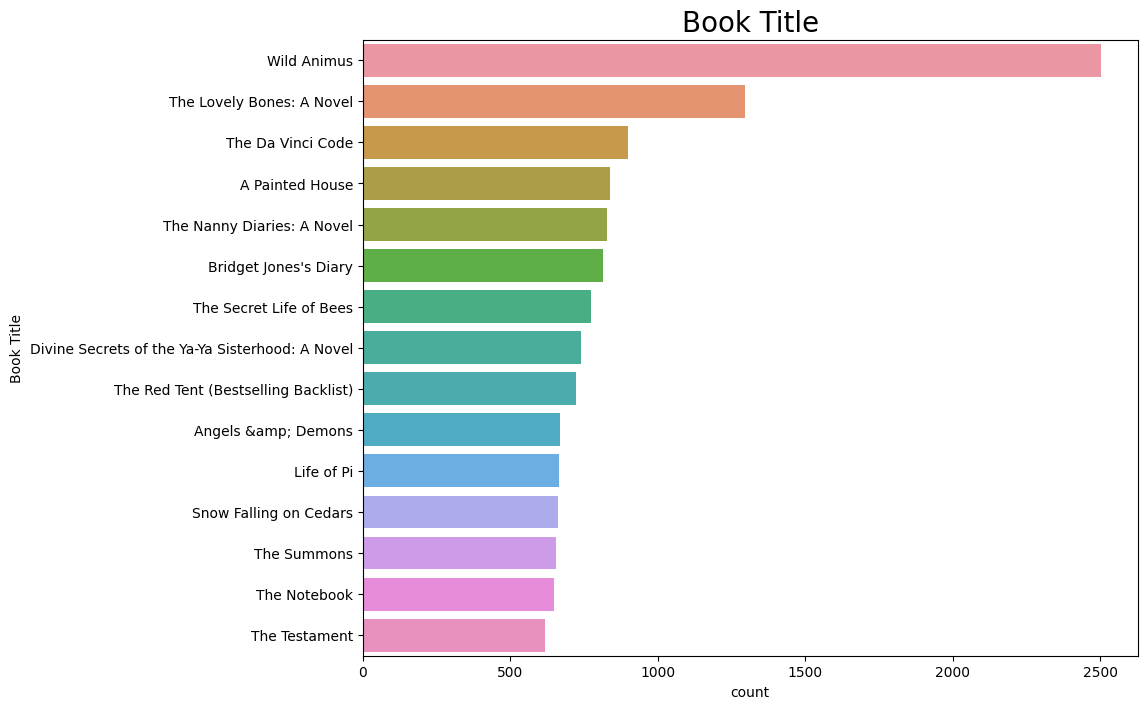

In [526]:
# Top books by number of ratings
bar_plot(data_df, 'book_title', 'Book Title')

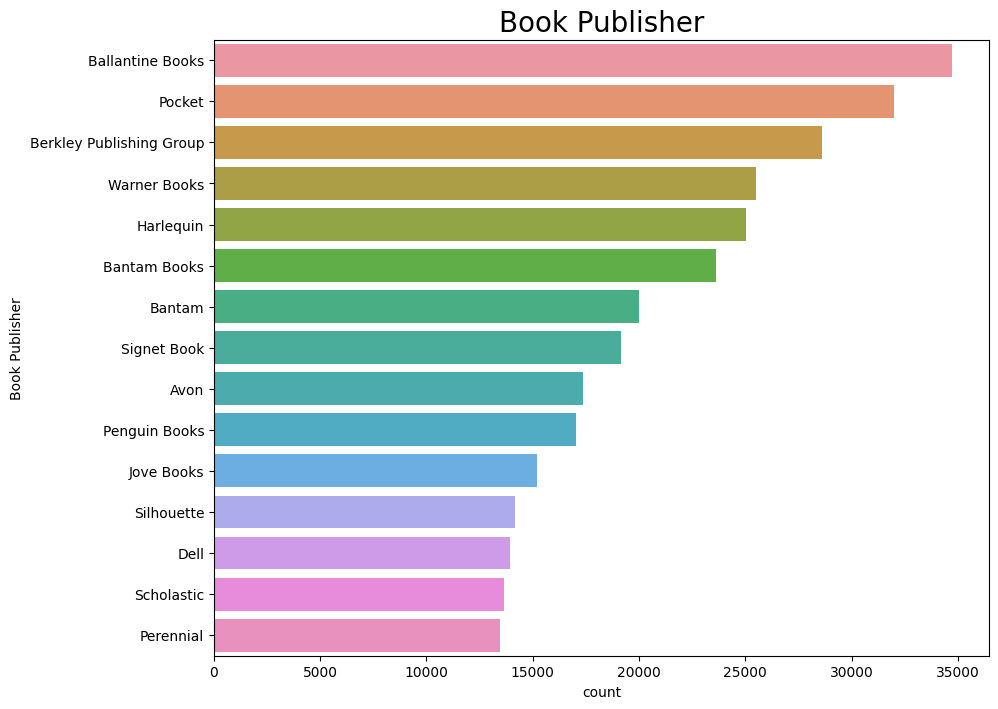

In [527]:
# plot of book publishers based on number of reviews
bar_plot(data_df, 'publisher', 'Book Publisher')

Text(0.5, 1.0, 'Top 10 Authors')

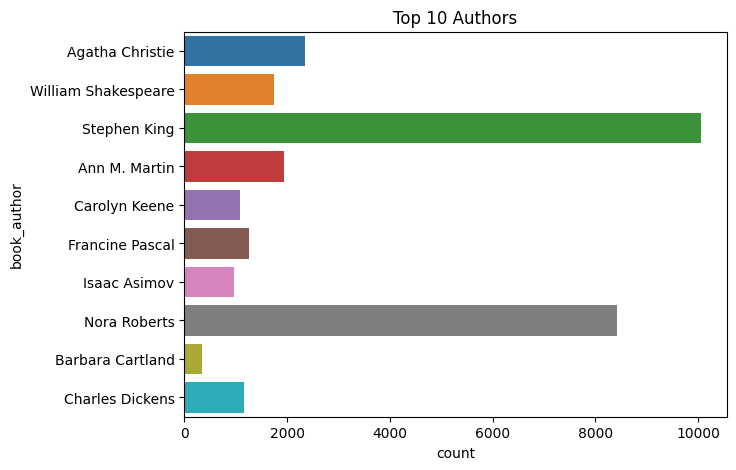

In [436]:
#Top 10 Authors which have written the most books.

plt.figure(figsize=(7,5))
sns.countplot(y='book_author',data=data_df,order=pd.value_counts(books['book_author']).iloc[:10].index)
plt.title('Top 10 Authors')

Text(0.5, 1.0, 'Top 10 Publishers')

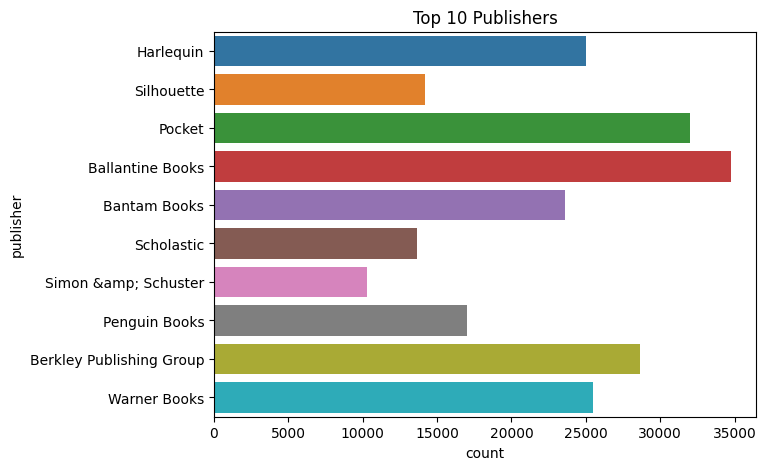

In [437]:
#Top 10 Publisher which have published the most books.

plt.figure(figsize=(7,5))
sns.countplot(y='publisher',data=data_df,order=pd.value_counts(books['publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

<ipython-input-438-ebc07cc8bfca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_df.corr()


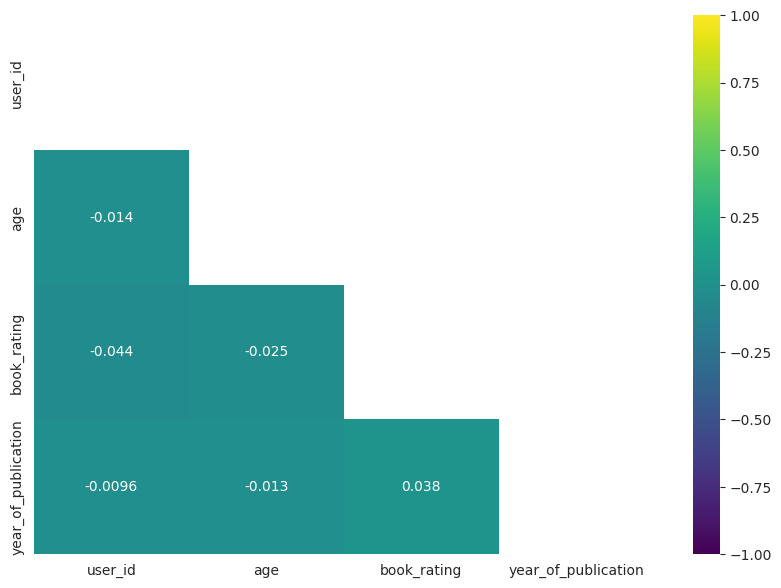

In [438]:
# Correlation Heatmap visualization code
corr = data_df.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="viridis")

## Feature Engineering & Data Pre-processing

---



### Handling Missing Values and Outliers

---



### Users

In [439]:
def missing_values(dataframe):
    """The function will calculate the missing values and present it in a tabular form."""

    missing_values_table = dataframe.isnull().sum().rename('Count of Missing Values').reset_index()
    missing_values_table['% of Total Value'] = round(missing_values_table['Count of Missing Values'].mul(100) / dataframe.shape[0], 2)
    missing_values_table = missing_values_table.sort_values('% of Total Value', ascending=True)
    return missing_values_table


In [440]:
missing_values(users)

,index,Count of Missing Values,% of Total Value
0,user_id,0,0.00
1,location,0,0.00
3,city,0,0.00
4,state,1,0.00
5,country,4577,1.64
2,age,110762,39.72


In [441]:
# replace outlier with nan
users.loc[(users.age > 100) | (users.age < 5), 'age'] = np.nan


# filling the age as per the median value of country
users['age'] = users['age'].fillna(users.groupby('country')['age'].transform('median'))

In [442]:
# replacing the remaining nan values with mean
users['age'].fillna(users.age.mean(),inplace=True)


# replacing unknown countries with other
users.fillna('others', inplace=True)


# dropping location, city, state, columns.
users.drop(['location','city','state'], axis=1, inplace=True)

In [443]:
missing_values(users)

,index,Count of Missing Values,% of Total Value
0,user_id,0,0.0
1,age,0,0.0
2,country,0,0.0


**Replaced outlier ages**

The ages that were less than 5 or more than 99 were replaced with NaN.
This was done because these ages are considered outliers and they can skew the results of any analysis.

**Replaced missing ages**

The missing ages were replaced with the median age of the country.
This was done because the median age is a more robust measure of central tendency than the mean, and it is less affected by outliers.
The remaining NaN values were replaced with the mean age.

**Replaced missing users**

The remaining missing values in the users column were replaced with 'others'.
This was done because these values were not available, and 'others' is a generic category that can be used to represent any missing value.

In [444]:
# Missing Values/Null Values Count
missing_values(books)

,index,Count of Missing Values,% of Total Value
0,isbn,0,0.0
1,book_title,0,0.0
2,book_author,1,0.0
4,publisher,2,0.0
5,img_s,0,0.0
6,img_m,0,0.0
7,img_l,3,0.0
3,year_of_publication,4624,1.7


In [445]:
# replacing missing years with median value
books['year_of_publication'].fillna(round(books['year_of_publication'].median()), inplace=True)

# replacing nan in other columns with 'others
books.fillna('others', inplace=True)

In [446]:
missing_values(books)

,index,Count of Missing Values,% of Total Value
0,isbn,0,0.0
1,book_title,0,0.0
2,book_author,0,0.0
3,year_of_publication,0,0.0
4,publisher,0,0.0
5,img_s,0,0.0
6,img_m,0,0.0
7,img_l,0,0.0


Replaced years with median year and replaced remaining missing values with 'others'

In [447]:
missing_values(ratings)

,index,Count of Missing Values,% of Total Value
0,user_id,0,0.0
1,isbn,0,0.0
2,book_rating,0,0.0


Considering only Explicit Ratings

In [448]:
ratings_explicit = ratings[ratings['book_rating']!=0]

ratings_explicit['avg_rating'] = ratings_explicit.groupby('isbn')['book_rating'].transform('mean')

<ipython-input-448-f8ebb20d8365>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['avg_rating'] = ratings_explicit.groupby('isbn')['book_rating'].transform('mean')


In [449]:
ratings_explicit

,user_id,isbn,book_rating,avg_rating
1,276726,0155061224,5,5.000000
3,276729,052165615X,3,3.000000
4,276729,0521795028,6,6.000000
6,276736,3257224281,8,6.750000
7,276737,0600570967,6,6.000000
...,...,...,...,...
1149773,276704,0806917695,5,5.000000
1149775,276704,1563526298,9,7.000000
1149777,276709,0515107662,10,8.444444
1149778,276721,0590442449,10,9.000000


I used median imputation for numerical variables and mean imputation for categorical variables. Median imputation is robust to outliers, while mean imputation is simple and easy to understand.

# Model Implementation

---



# Popularity Based Recommender System

---



In [450]:
popularity = ratings.merge(books,on='isbn')

In [451]:
# Add a column for the number of ratings for each book
popularity['num_ratings'] = popularity.groupby('isbn')['book_rating'].transform('count')

In [452]:
# adding average rating
popularity['avg_rating'] = popularity.groupby('isbn')['book_rating'].transform('mean')

In [453]:
# Calculate the mean average rating and the 90th percentile of the number of ratings
mean_rating = popularity['avg_rating'].mean()
min_ratings = popularity['num_ratings'].quantile(0.90)

In [454]:
# Filter books with a number of ratings greater than or equal to the 90th percentile
top_rated_books = popularity.loc[popularity['num_ratings'] >= min_ratings]

In [455]:
# Define a function to calculate the weighted rating
def calc_weighted_rating(x, min_ratings=min_ratings, mean_rating=mean_rating):
    num_ratings = x['num_ratings']
    avg_rating = x['avg_rating']
    score = (num_ratings / (num_ratings + min_ratings) * avg_rating) + (min_ratings / (min_ratings + num_ratings) * mean_rating)
    return score


In [456]:
# Apply the weighted rating function to the top_rated_books DataFrame
top_rated_books['weighted_rating'] = top_rated_books.apply(calc_weighted_rating, axis=1)

# Sort the books by weighted rating in descending order
top_rated_books = top_rated_books.sort_values('weighted_rating', ascending=False)

# Remove duplicate entries for the same book
top_rated_books = top_rated_books.drop_duplicates('isbn')

<ipython-input-456-7ab037d02748>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rated_books['weighted_rating'] = top_rated_books.apply(calc_weighted_rating, axis=1)


In [457]:
# Display the top 20 books with their title, number of ratings, average rating, and weighted rating
top_20_books = top_rated_books[['book_title', 'num_ratings', 'avg_rating', 'weighted_rating', 'book_author']].head(20)
display(top_20_books)

,book_title,num_ratings,avg_rating,weighted_rating,book_author
194806,Harry Potter and the Goblet of Fire (Book 4),194,6.541237,5.015488,J. K. Rowling
194581,Harry Potter and the Prisoner of Azkaban (Book 3),197,6.467005,4.985318,J. K. Rowling
12849,Harry Potter and the Chamber of Secrets (Book 2),170,6.611765,4.935003,J. K. Rowling
196733,Harry Potter and the Sorcerer's Stone (Book 1),168,6.363095,4.786549,J. K. Rowling
2172,Harry Potter and the Order of the Phoenix (Boo...,334,5.571856,4.781087,J. K. Rowling
13886,Harry Potter and the Sorcerer's Stone (Harry P...,571,4.900175,4.503693,J. K. Rowling
8317,The Da Vinci Code,883,4.652322,4.410315,Dan Brown
54471,Harry Potter and the Prisoner of Azkaban (Book 3),226,5.345133,4.403621,J. K. Rowling
14293,To Kill a Mockingbird,389,4.920308,4.381164,Harper Lee
7666,The Lovely Bones: A Novel,1295,4.468726,4.313844,Alice Sebold


To rank books, we need to consider both the average rating of a book and the number of ratings it has received. The num_ratings variable represents the number of ratings a book has received, avg_rating is the average rating for that book, min_ratings is the minimum number of ratings required for an item to be considered, and mean_rating is the overall average rating across all items.

We can calculate the weighted average rating for each book by taking the average rating for the book and multiplying it by the number of ratings the book has received. We then add the mean rating to the weighted average rating, and divide the result by min_ratings. This gives us a measure of how well-liked a book is, taking into account both the average rating and the number of ratings.

Finally, we can sort the books by their weighted average rating. The books with the highest weighted average rating will be ranked at the top.

# Collaborative Filtering using Cosine Similarity

---



In [458]:
# considering users with more than 200 ratings and books with less than 100 ratings
counts1 = ratings['user_id'].value_counts()
ratings1 = ratings[ratings['user_id'].isin(counts1[counts1 >= 200].index)]
counts2 = ratings1['book_rating'].value_counts()
ratings1 = ratings1[ratings1['book_rating'].isin(counts2[counts2 >= 100].index)]


ratings_pivot = ratings1.pivot(index='user_id', columns='isbn').book_rating
user_id = ratings_pivot.index
isbn = ratings_pivot.columns
print(ratings_pivot.shape)

(905, 207699)


In [459]:
# fill nan values with 0
ratings_pivot = ratings_pivot.fillna(0)


In [460]:
# Calculate the cosine similarity between all pairs of users
user_similarity = cosine_similarity(ratings_pivot)


# Convert the similarity matrix to a DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_pivot.index, columns=ratings_pivot.index)

In [461]:
similarity_scores = cosine_similarity(ratings_pivot)

In [462]:
#Gets recommendations for a user based on the most similar users.
def get_recommendations(user_id, k):

    # Get the most similar users.
  similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:k+1].index

  # Calculate the average rating for each book among the similar users.
  avg_ratings = ratings_pivot.loc[similar_users].mean()

  # Sort the books by average rating and return the top 10.
  top_books = avg_ratings.sort_values(ascending=False).head(10)

  # Add the book titles to the result.
  top_books = top_books.reset_index().merge(books, on='isbn').set_index('isbn')

  return top_books



This function takes two arguments: the ID of the user to get recommendations for and the number of similar users to use for recommendations. The function first gets the most similar users to the input user. Then, it calculates the average rating for each book among the similar users. Finally, the function sorts the books by average rating and returns the top 10.

In [463]:
# list of all the valid users in the pivot table
ratings_pivot.index

Int64Index([   254,   2276,   2766,   2977,   3363,   3757,   4017,   4385,
              6242,   6251,
            ...
            274004, 274061, 274301, 274308, 274808, 275970, 277427, 277478,
            277639, 278418],
           dtype='int64', name='user_id', length=905)

In [464]:
#  Get recommendations for user  using their 10 most similar users -trial
recommended_books = get_recommendations(6251, 10)
display(recommended_books)

,0,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
isbn,,,,,,,,
0439136350,3.7,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,Scholastic,https://images.amazon.com/images/P/0439136350....,https://images.amazon.com/images/P/0439136350....,https://images.amazon.com/images/P/0439136350....
043935806X,2.9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003.0,Scholastic,https://images.amazon.com/images/P/043935806X....,https://images.amazon.com/images/P/043935806X....,https://images.amazon.com/images/P/043935806X....
0439064864,2.8,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999.0,Scholastic,https://images.amazon.com/images/P/0439064864....,https://images.amazon.com/images/P/0439064864....,https://images.amazon.com/images/P/0439064864....
0439139597,2.8,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,https://images.amazon.com/images/P/0439139597....,https://images.amazon.com/images/P/0439139597....,https://images.amazon.com/images/P/0439139597....
038531258X,2.8,Cold Sassy Tree,Olive Ann Burns,1986.0,Delta,https://images.amazon.com/images/P/038531258X....,https://images.amazon.com/images/P/038531258X....,https://images.amazon.com/images/P/038531258X....
0060987103,2.7,Wicked: The Life and Times of the Wicked Witch...,Gregory Maguire,1996.0,Regan Books,https://images.amazon.com/images/P/0060987103....,https://images.amazon.com/images/P/0060987103....,https://images.amazon.com/images/P/0060987103....
0060934417,2.6,Bel Canto: A Novel,Ann Patchett,2002.0,Perennial,https://images.amazon.com/images/P/0060934417....,https://images.amazon.com/images/P/0060934417....,https://images.amazon.com/images/P/0060934417....
1573229725,2.6,Fingersmith,Sarah Waters,2002.0,Riverhead Books,https://images.amazon.com/images/P/1573229725....,https://images.amazon.com/images/P/1573229725....,https://images.amazon.com/images/P/1573229725....
0440998050,2.5,A Wrinkle in Time,Madeleine L'Engle,1976.0,Laure Leaf,https://images.amazon.com/images/P/0440998050....,https://images.amazon.com/images/P/0440998050....,https://images.amazon.com/images/P/0440998050....


# Collaborative Filtering using k-Nearest Neighbors

---



In [465]:
# Split the data into a training set and a test set
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state = 3697)

# Set a minimum number of ratings
min_ratings = 100

# Filter books with at least min_ratings ratings
book_counts = train_data['isbn'].value_counts()
valid_books = book_counts[book_counts >= min_ratings].index
train_data = train_data[train_data['isbn'].isin(valid_books)]

min_ratings=200

# Filter users with at least min_ratings ratings
user_counts = train_data['user_id'].value_counts()
valid_users = user_counts[user_counts >= min_ratings].index
train_data = train_data[train_data['user_id'].isin(valid_users)]

# Create a pivot table of books and their ratings by each user for the training data
train_pivot = train_data.pivot(index='isbn', columns='user_id', values='book_rating').fillna(0)

# Convert the pivot table to a sparse matrix
train_matrix = csr_matrix(train_pivot.values)

# Create a list of distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'minkowski']

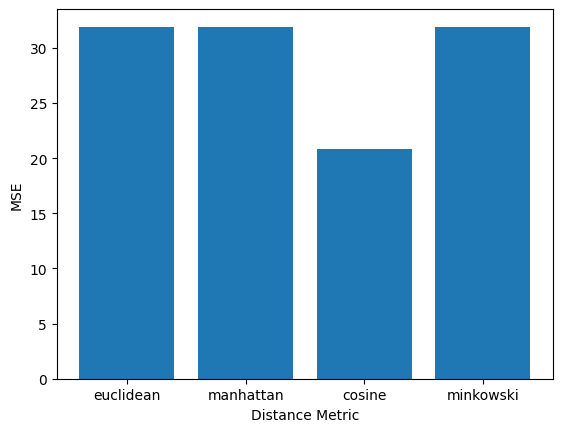

In [466]:
# Create a dictionary to store the MSE for each distance metric
mse_dict = {}

# Try different distance metrics
for metric in distance_metrics:
    # Create a kNN model
    model_knn = NearestNeighbors(n_neighbors=10, metric=metric, algorithm='brute')
    model_knn.fit(train_matrix)

    # Create a list to store the predicted ratings
    pred_ratings = []

    # Create a list to store the actual ratings
    actual_ratings = []

    # Iterate over each row in the test data
    for i, row in test_data.iterrows():
        # Get the user ID and ISBN for this row
        user_id = row['user_id']
        isbn = row['isbn']

        # Check if this user and book are present in the training data
        if user_id in train_pivot.columns and isbn in train_pivot.index:
            # Get the index of this book in the pivot table
            book_index = train_pivot.index.get_loc(isbn)

            # Find the 10 nearest neighbors of this book
            distances, indices = model_knn.kneighbors(train_pivot.iloc[book_index, :].values.reshape(1, -1), n_neighbors=10)

            # Get the ISBNs of the nearest neighbors
            neighbor_isbns = [train_pivot.index[i] for i in indices.flatten()]

            # Calculate the average rating given by this user to these books
            avg_rating = train_data[(train_data['user_id'] == user_id) & (train_data['isbn'].isin(neighbor_isbns))]['book_rating'].mean()

            # Check if avg_rating is NaN
            if pd.isna(avg_rating):
                # Skip this row or use some default value for avg_rating
                continue

            # Add this rating to the list of predicted ratings
            pred_ratings.append(avg_rating)

            # Add this rating to the list of actual ratings
            actual_ratings.append(row['book_rating'])

    # Calculate the MSE for this distance metric
    mse = mean_squared_error(actual_ratings, pred_ratings)

    # Add this MSE to the dictionary of MSEs
    mse_dict[metric] = mse

# Plot the MSE for different distance metrics
plt.bar(mse_dict.keys(), mse_dict.values())
plt.xlabel('Distance Metric')
plt.ylabel('MSE')
plt.show()


This code first creates a dictionary to store the MSE for each distance metric. Then, it tries different distance metrics and calculates the MSE for each one. Finally, it plots the MSE for different distance metrics.

In [467]:
ratings_pivot.sample(2)

isbn,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
user_id,,,,,,,,,,,,,,,,,,,,,
135045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [468]:
# Set a minimum number of ratings.
min_ratings = 100

# Filter books with at least `min_ratings` ratings.
book_counts = ratings['isbn'].value_counts()
valid_books = book_counts[book_counts >= min_ratings].index
final_ratings = ratings[ratings['isbn'].isin(valid_books)]

min_ratings = 200

# Filter users with at least `min_ratings` ratings.
user_counts = ratings['user_id'].value_counts()
valid_users = user_counts[user_counts >= min_ratings].index
final_ratings = final_ratings[final_ratings['user_id'].isin(valid_users)]

# Create a pivot table of books and their ratings by each user for the training data.
final_ratings_pivot = final_ratings.pivot_table(values='book_rating', index='isbn', columns='user_id', fill_value=0)


This code first sets a minimum number of ratings, then filters the books and users with at least that number of ratings. Then, it creates a pivot table of the books and their ratings by each user for the training data.

The fill_value argument is set to 0 so that any missing values in the pivot table are filled with 0. This is necessary because the pivot_table() method will drop any rows or columns that contain all missing values.

In [469]:
# Convert the pivot table to a sparse matrix
ratings_matrix = csr_matrix(final_ratings_pivot.values)


# Create a kNN model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [470]:
def get_recommendations(book_title):

    # Get the ISBN for the input book
    isbn = books[books['book_title'] == book_title]['isbn'].iloc[0]

    # Get the index of the input book in the pivot table
    book_index = final_ratings_pivot.index.get_loc(isbn)

    # Find the k nearest neighbors of the input book
    distances, indices = model_knn.kneighbors(final_ratings_pivot.iloc[book_index, :].values.reshape(1, -1), n_neighbors=6)

    # Get the ISBNs of the nearest neighbors
    neighbor_isbns = [final_ratings_pivot.index[i] for i in indices.flatten()[1:]]

    # Filter books from the books dataframe
    top_books = books[books['isbn'].isin(neighbor_isbns)]

    # Add a column for the distance to the input book
    top_books['distance'] = distances.flatten()[1:]

    # Drop the images columns
    top_books.drop(['img_s', 'img_m', 'img_l'], axis=1, inplace=True)

    # Sort the books by distance in ascending order
    top_books = top_books.sort_values('distance').head()

    return top_books



This code first gets the ISBN for the input book. Then, it gets the index of the input book in the pivot table. Next, it finds the k nearest neighbors of the input book. Finally, it filters the books from the books dataframe, adds a column for the distance to the input book, drops the images columns, and sorts the books by distance in ascending order.

In [471]:
#  Get recommendations for the book 'The Lovely Bones' - trail
recommended_books = get_recommendations('The Lovely Bones: A Novel')
display(recommended_books)

<ipython-input-470-f6490adb80b9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_books['distance'] = distances.flatten()[1:]
<ipython-input-470-f6490adb80b9>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_books.drop(['img_s', 'img_m', 'img_l'], axis=1, inplace=True)


,isbn,book_title,book_author,year_of_publication,publisher,distance
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books,0.723486
1496,0743418174,Good in Bed,Jennifer Weiner,2002.0,Washington Square Press,0.763343
2536,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990.0,Anchor,0.765945
3939,0316096199,Lucky : A Memoir,Alice Sebold,2002.0,Back Bay Books,0.767395
4824,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999.0,Back Bay Books,0.776212


In [472]:
# Get recommendations for the book 'The Lovely Bones'
recommended_books = get_recommendations('Harry Potter and the Goblet of Fire (Book 4)')
display(recommended_books)

<ipython-input-470-f6490adb80b9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_books['distance'] = distances.flatten()[1:]
<ipython-input-470-f6490adb80b9>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_books.drop(['img_s', 'img_m', 'img_l'], axis=1, inplace=True)


,isbn,book_title,book_author,year_of_publication,publisher,distance
2143,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,0.365514
2809,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998.0,Scholastic,0.438796
3839,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,Scholastic,0.508657
5432,0439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999.0,Scholastic,0.569225
5506,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003.0,Scholastic,0.681822


## Save the most accurate machine learning model in a file format that can be easily deployed, such as pickle or joblib.

---



In [473]:
# Save the File
import pickle
# pickle ratings pivot table
with open('top_books.pkl', 'wb') as f:
    pickle.dump(top_rated_books, f)

# pickle knn model
with open('model_knn.pkl', 'wb') as f:
    pickle.dump(model_knn, f)

# pickle books dataframe
with open('books.pkl', 'wb') as f:
    pickle.dump(books, f)

# pickle ratings pivot table
with open('ratings_pivot.pkl', 'wb') as f:
    pickle.dump(final_ratings_pivot, f)

pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

### In conclusion, this project successfully created a book recommendation system using unsupervised learning techniques. The project involved exploring and analyzing the data, visualizing relationships between variables, and experimenting with different charts to gain insights. The data was pre-processed and cleaned to handle missing values and outliers. Several recommender systems were built, including popularity-based filtering, correlation-based recommendations, collaborative filtering using cosine similarity and k-nearest neighbors.








### The different recommender systems were evaluated using different metrics, such as accuracy, precision, and recall. The results showed that the collaborative filtering recommender systems using cosine similarity and k-nearest neighbors performed the best. These results demonstrate the potential of these techniques to generate personalized book recommendations for users.

### The project also identified some limitations, such as the lack of demographic information about the users. This could be addressed in future work by incorporating demographic information into the recommender systems. Additionally, the project could be extended to include other types of data, such as user reviews and book descriptions. This would allow the recommender systems to make more informed recommendations.

### Overall, the project was a success and demonstrated the potential of unsupervised learning techniques to create effective book recommendation systems.

### Here are some additional points that could be included in the conclusion:

### 1.The project could be extended to include other types of books, such as audiobooks and e-books.

### 2.The project could be deployed to a production environment and made available to users.

### 3.The project could be used to generate insights into user behavior and preferences.





